## Car Price Prediction Challenge
https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
df = pd.read_csv(".//static//csv//car_price_prediction.csv")
print(df.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


Автомобильный рынок представляет собой динамичную среду, где цены, спрос и предложение автомобилей постоянно меняются в зависимости от множества факторов, таких как возраст автомобиля, пробег, техническое состояние, марка, модель и другие характеристики. Основная проблема заключается в том, как эффективно анализировать и использовать эти данные для принятия бизнес-решений, таких как оценка стоимости подержанных автомобилей, прогнозирование спроса на определенные модели и типы автомобилей, а также определение факторов, наиболее влияющих на ценность автомобиля.

In [56]:
print(df.info, "\n")

<bound method DataFrame.info of              ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather inter

**Объектами наблюдения** являются автомобили, каждый из которых описывается определенным набором характеристик (атрибутов). Атрибуты включают как *количественные* данные (например, цена, объем двигателя), так и *качественные* (например, цвет, тип топлива, марка).

**Анализ сведений о каждом наборе данных**: В данном случае каждый набор данных — это информация об отдельных автомобилях. Здесь присутствуют атрибуты такие как: идентификатор (ID), цена, марка, модель, год выпуска, объем двигателя, тип коробки передач, тип топлива, пробег, цилиндры, тип коробки передач, ведущие колеса, двери, колеса, цвет, подушки безопасности.



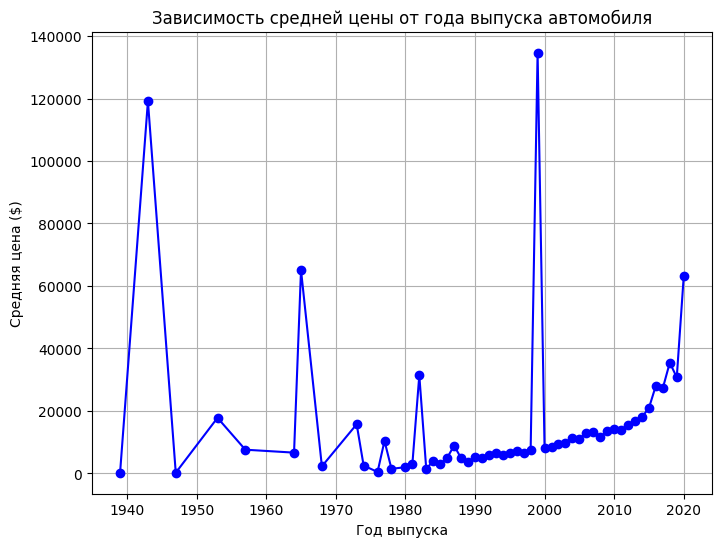

In [61]:

mean_price_per_year = df.groupby('Prod. year')['Price'].mean()
plt.figure(figsize=(8, 6))
mean_price_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Зависимость средней цены от года выпуска автомобиля')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя цена ($)')
plt.grid(True)
plt.show()

**Связь между средней ценой автомобиля и годом:** 
Этот график полезен для анализа динамики цен на автомобили в зависимости от года выпуска и выявления тенденций на рынке.

Из графика следует что автомобили растут в цене по мере увеличения года, за исключением некоторых автомобилей, которые повышают свою цену до невероятных значений.

**Пример бизнес-целей:**

1. Ценообразование автомобилей

Цель: Создать модель, которая точно предсказывает рыночную стоимость автомобиля на основе ограниченного набора характеристик: года выпуска, пробега и объема двигателя.

Эффекты для бизнеса: Увеличение доходов за счет точного определения рыночной стоимости, минимизация убытков от недооценки или переоценки автомобилей.

Вход:

* Год выпуска
* Пробег
* Объем двигателя

Целевой признак: Цена автомобиля.

2. Анализ спроса и предложения

Цель: Провести анализ спроса на автомобили по моделям, годам выпуска и регионам для лучшего планирования ассортимента и распределения ресурсов.

Эффекты для бизнеса: Оптимизация ассортимента и планирования закупок, снижение издержек на хранение нераспроданных автомобилей.

Вход:

* Модель автомобиля
* Год выпуска
* Регион продажи

Целевой признак: Количество проданных автомобилей (спрос) или количество доступных автомобилей (предложение).

3. Оценка состояния подержанных автомобилей

Цель: Разработать модель для оценки состояния автомобиля на основе пробега и года выпуска, которая поможет при установлении рыночной стоимости подержанных автомобилей.

Эффекты для бизнеса: Ускорение процессов оценки подержанных автомобилей, повышение доверия клиентов к оценке автомобилей.

Вход:

* Пробег
* Возраст автомобиля (год выпуска)

Целевой признак: Оценка технического состояния автомобиля.

**Опредиление проблем данных с помощью кода:**

In [63]:
numeric_columns = ['Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

df[numeric_columns] = df[numeric_columns].replace("-", np.nan)

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

max_value = df.max(axis=0)

columns_with_zero = df.columns[(df == 0).any()]

numeric_data = df.select_dtypes(include='number')

shum = numeric_data.var()

low_dispers = 0.1
low_var_columns = shum[shum < low_dispers]

year = df['Prod. year']

print("Максимальные значения:\n", max_value, "\n")
print("Признаки с нулевыми значениями:\n", columns_with_zero, "\n")
print("Признаки с низкой дисперсией:\n", low_var_columns, "\n")
print("Год производства:\n", year)

Максимальные значения:
 ID                          45816654
Price                       26307500
Levy                           11714
Manufacturer                    სხვა
Model                             xD
Prod. year                      2020
Category                   Universal
Leather interior                 Yes
Fuel type             Plug-in Hybrid
Engine volume                   20.0
Mileage                 2147483647.0
Cylinders                       16.0
Gear box type               Variator
Drive wheels                    Rear
Doors                             >5
Wheel               Right-hand drive
Color                         Yellow
Airbags                           16
dtype: object 

Признаки с нулевыми значениями:
 Index(['Levy', 'Engine volume', 'Mileage', 'Airbags'], dtype='object') 

Признаки с низкой дисперсией:
 Series([], dtype: float64) 

Год производства:
 0        2010
1        2011
2        2006
3        2011
4        2014
         ... 
19232    1999
19233    20

1. Признаки, содержащие нулевые значения: 'Engine volume' и 'Airbags'. Наличие нулевых значений может создать смещение при анализе, если учитывать такие автомобили.
2. Признаки 'Price', 'Engine volume', и 'Cylinders' могут иметь аномально высокие значения, что указывает на наличие выбросов.
3. Признаки с низкой дисперсией, такие как Leather interior, Fuel type, Drive wheels, могут иметь слишком малую вариативность, что снижает их значимость для анализа.
4. Признак Prod. year варьируется от 1900 до 2020, что делает его полезным для анализа возрастных характеристик автомобилей. Однако автомобили более старого возраста могут быть редкими в выборке, что может повлиять на выводы относительно корреляции между годом выпуска и ценой.

**Примеры решения обнаруженных проблем для каждого набора данных:**

1. Нулевые значения: удаление строк с нулями если нулевые значения редки и их удаление не повлияет на анализ.
2. Аномально высокие значения: можно ограничить выбросы, заменив их на определенные пороговые значения. Это позволит избежать влияния аномально высоких значений на анализ.
3. Низкая дисперсия признаков: если признаки имеют низкую вариативность, можно преобразовать их в бинарные переменные. Это сделает признаки более значимыми для моделей.
4. Устаревшие данные: можно отфильтровать автомобили по годам выпуска, чтобы учесть только актуальные модели.

**Оценить качество каждого набора данных:** 

1. Информативность: Набор данных предоставляет достаточную информацию для анализа характиристик машины.
2. Степень покрытия: Включает данные только о автомобилях одного региона, что ограничивает возможности обобщения результатов на другие регионы.
3. Соответствие реальным данным: Данные в целом соответствуют реальным значениям, но встречаются редкие выбросы.
4. Согласованность меток: Метки, такие как тип топлива и категория автомобиля, имеют четкие и согласованные значения, что способствует правильному анализу данных.

**Устранить проблему пропущенных данных. Для каждого набора данных:**

In [62]:
numeric_columns = ['Price', 'Levy', 'Engine volume', 'Cylinders', 'Airbags']
df[numeric_columns] = df[numeric_columns].replace("-", np.nan)
print("Пропущенные значения до обработки:")
print(df.isnull().sum())

df['Levy'] = df['Levy'].fillna(0)  # Подстановка 0
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)  # Среднее значение
df.dropna(subset=['Fuel type'], inplace=True)  # Удаление строк

print("Пропущенные значения после обработки:")
print(df.isnull().sum())

Пропущенные значения до обработки:
ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64
Пропущенные значения после обработки:
ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


**Выполнить разбиение каждого набора данных на обучающую, контрольную и тестовую выборки:**

In [64]:
df_numeric = df.select_dtypes(include='number')

X = df.drop('Price', axis=1)  
y = df['Price']  

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Проверка размеров выборок
print(f"Исходный размер строк: {df_numeric.shape[0]}")
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер контрольной выборки: {X_val.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Исходный размер строк: 19237
Размер обучающей выборки: 11541
Размер контрольной выборки: 3848
Размер тестовой выборки: 3848


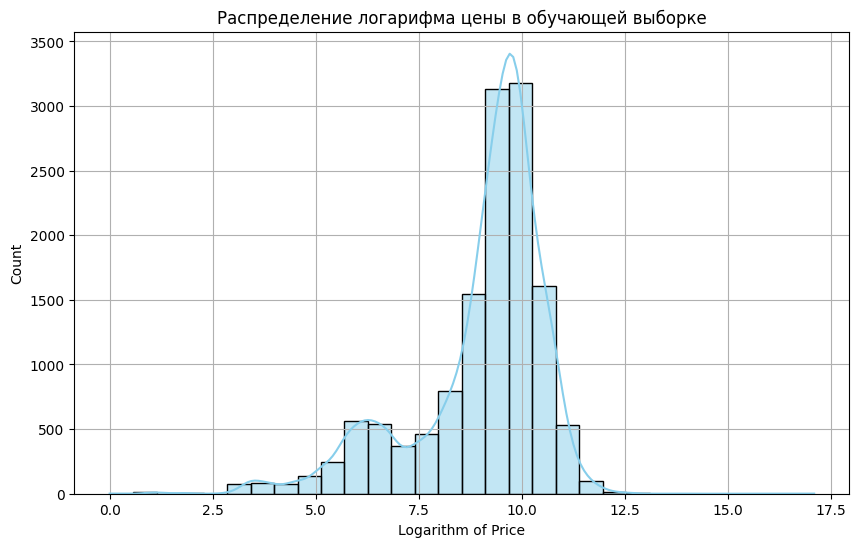

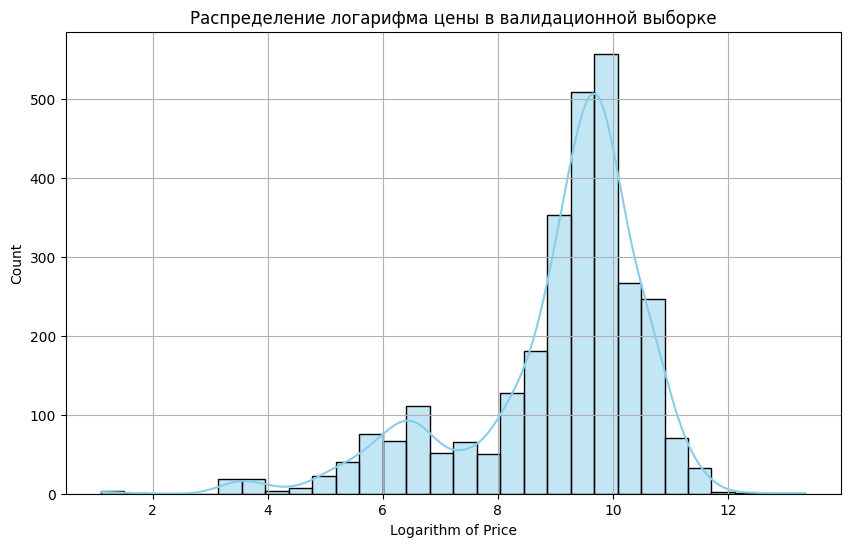

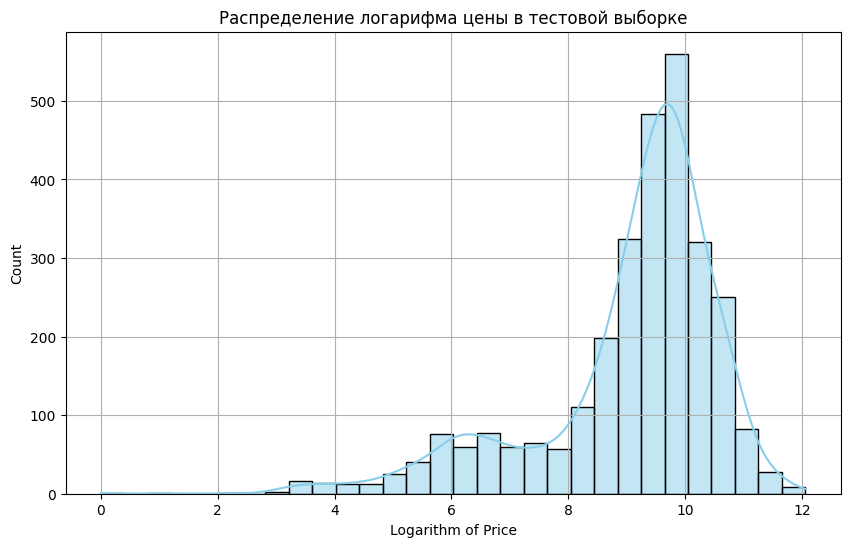

Статистические показатели для обучающей выборки:
Среднее значение: 9.02
Стандартное отклонение: 1.60
Минимальное значение: 0.00
Максимальное значение: 17.09
Количество наблюдений: 13465

Статистические показатели для валидационной выборки:
Среднее значение: 9.03
Стандартное отклонение: 1.59
Минимальное значение: 1.10
Максимальное значение: 13.35
Количество наблюдений: 2886

Статистические показатели для тестовой выборки:
Среднее значение: 9.06
Стандартное отклонение: 1.56
Минимальное значение: 0.00
Максимальное значение: 12.06
Количество наблюдений: 2886



In [65]:

df['price_log'] = np.log(df['Price'])

X = df.drop(['Price', 'price_log'], axis=1) 
y = df['price_log']  

X = X.select_dtypes(include='number')

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def plot_distribution(data, title):
    """Построение гистограммы распределения целевого признака"""
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, bins=30, color='skyblue')
    plt.title(title)
    plt.xlabel('Logarithm of Price')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

plot_distribution(y_train, 'Распределение логарифма цены в обучающей выборке')
plot_distribution(y_val, 'Распределение логарифма цены в валидационной выборке')
plot_distribution(y_test, 'Распределение логарифма цены в тестовой выборке')

def get_statistics(df, name):
    print(f"Статистические показатели для {name} выборки:")
    print(f"Среднее значение: {df.mean():.2f}")
    print(f"Стандартное отклонение: {df.std():.2f}")
    print(f"Минимальное значение: {df.min():.2f}")
    print(f"Максимальное значение: {df.max():.2f}")
    print(f"Количество наблюдений: {df.count()}\n")

get_statistics(y_train, "обучающей")
get_statistics(y_val, "валидационной")
get_statistics(y_test, "тестовой")

Обучающая, валидационная и тестовая выборки достаточно сбалансированы по основным статистическим показателям (среднее, стандартное отклонение, количество наблюдений), что говорит о хорошем качестве разбиения данных. Различия минимальны, и распределение данных выглядит однородным. Нет необходимости использовать методы аугментации данных, так как выборки сбалансированы и объем данных достаточно велик.

**Выполнить приращение данных методами выборки с избытком (oversampling) и выборки с недостатком (undersampling):**

In [69]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

df['price_log'] = np.log(df['Price'])

df['price_category'] = pd.qcut(df['price_log'], q=5, labels=[0, 1, 2, 3, 4])

X = df.drop(['Price', 'price_log', 'price_category'], axis=1)
y = df['price_category']
X = pd.get_dummies(X, drop_first=True)
for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Распределение классов после SMOTE (oversampling):")
print(pd.Series(y_train_smote).value_counts())

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Распределение классов после RandomUnderSampler (undersampling):")
print(pd.Series(y_train_under).value_counts())

Распределение классов после SMOTE (oversampling):
price_category
0    2782
1    2782
2    2782
3    2782
4    2782
Name: count, dtype: int64
Распределение классов после RandomUnderSampler (undersampling):
price_category
0    2613
1    2613
2    2613
3    2613
4    2613
Name: count, dtype: int64


## Forbes 2022 Billionaires data
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [73]:
df2 = pd.read_csv(".//static//csv//forbes_billionaires.csv")
print(df2.columns)

Index(['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')


Мировой рынок миллионеров представляет собой сложную и динамичную среду, где состояние, возраст, страна происхождения и источники богатства сильно варьируются в зависимости от множества факторов. Основная проблема заключается в том, как правильно интерпретировать эти данные, выявлять ключевые корреляции между параметрами, и на основе этого строить прогнозы по развитию рынка капиталов.

In [74]:
print(df2.info, "\n")

<bound method DataFrame.info of       Rank                        Name  Networth  Age        Country  \
0         1                 Elon Musk      219.0   50  United States   
1         2                Jeff Bezos      171.0   58  United States   
2         3  Bernard Arnault & family      158.0   73         France   
3         4                Bill Gates      129.0   66  United States   
4         5            Warren Buffett      118.0   91  United States   
...     ...                        ...       ...  ...            ...   
2595   2578    Jorge Gallardo Ballart        1.0   80          Spain   
2596   2578              Nari Genomal        1.0   82    Philippines   
2597   2578            Ramesh Genomal        1.0   71    Philippines   
2598   2578            Sunder Genomal        1.0   68    Philippines   
2599   2578     Horst-Otto Gerberding        1.0   69        Germany   

                      Source                Industry  
0              Tesla, SpaceX             Automot

**Объектами наблюдения** являются миллионеры. Каждый миллионер представлен одной строкой в таблице, которая описывает его основные характеристики.

**Анализ сведений о каждом наборе данных**: В данном случае каждый набор данных — это информация об отдельном миллиардере. Здесь присутствуют атрибуты такие как: Ранг, Имя, Состояние, Возраст, Страна, Источник дохода, Отрасль.

**Связи между объектами:** Можно выявить связи между возрастом и состоянием или источник дохода и состояние.


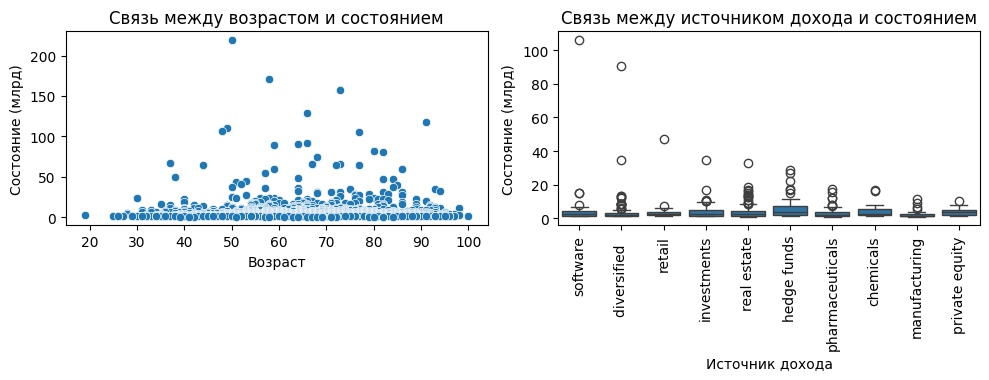

In [84]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df2, x='Age', y='Networth')
plt.title('Связь между возрастом и состоянием')
plt.xlabel('Возраст')
plt.ylabel('Состояние (млрд)')


plt.subplot(2, 2, 2)
top_sources = df2['Source'].value_counts().index[:10]
sns.boxplot(data=df2[df2['Source'].isin(top_sources)], x='Source', y='Networth')
plt.title('Связь между источником дохода и состоянием')
plt.xticks(rotation=90)
plt.xlabel('Источник дохода')
plt.ylabel('Состояние (млрд)')

plt.tight_layout()
plt.show()

Из 1 графика видно что меньше всего миллиардеров от 0 до 30 и от 95 до 100 лет. Из 2 графка видно больше всего миллиардеров в diversified и real estate

1. Оценка состояния миллиардера

Цель: Разработать модель, которая точно предсказывает состояние миллиардера на основе ограниченного набора характеристик: возраста, страны проживания и отрасли, в которой он работает.

Эффекты для бизнеса: Более точная оценка состояния миллиардеров позволит компаниям лучше адаптировать свои маркетинговые стратегии, улучшить целевую рекламу и предложить персонализированные финансовые услуги для богатых клиентов.

Вход:

* Возраст миллиардера
* Страна проживания
* Отрасль

Целевой признак: Состояние миллиардера (Networth).

2. Анализ влияния источников дохода на состояние

Цель: Провести анализ, чтобы выявить наиболее прибыльные источники дохода среди миллиардеров и как они влияют на накопленное состояние.

Эффекты для бизнеса: Компании могут использовать эту информацию для определения наиболее перспективных отраслей для инвестиций и бизнес-стратегий, а также для оптимизации инвестиционных портфелей.

Вход:

* Источник дохода
* Возраст миллиардера
* Страна проживания

Целевой признак: Состояние миллиардера (Networth).

3. Прогнозирование роста капитала

Цель: Разработать модель для прогнозирования роста капитала на основе возраста, страны проживания и источника дохода, которая поможет в оценке потенциального роста состояния миллиардера в будущем.

Эффекты для бизнеса: Компании смогут лучше планировать свои инвестиции и расширять деловые связи с растущими миллиардерами, оптимизируя свои ресурсы для привлечения наиболее перспективных клиентов.

Вход:

* Возраст миллиардера
* Страна проживания
* Источник дохода

Целевой признак: Прогнозируемый рост состояния миллиардера (Networth).



**Опредиление проблем данных с помощью кода:**

In [86]:
max_value = df2.max(axis=0)

columns_with_zero = df2.columns[(df2 == 0).any()]

numeric_data = df2.select_dtypes(include='number')

shum = numeric_data.var()

low_dispers = 0.1
low_var_columns = shum[shum < low_dispers]


print("Максимальные значения:\n", max_value, "\n")
print("Признаки с нулевыми значениями:\n", columns_with_zero, "\n")
print("Признаки с низкой дисперсией:\n", low_var_columns, "\n")

Максимальные значения:
 Rank                            2578
Name             Zygmunt Solorz-Zak 
Networth                       219.0
Age                              100
Country                     Zimbabwe
Source      wireless networking gear
Industry              diversified   
dtype: object 

Признаки с нулевыми значениями:
 Index([], dtype='object') 

Признаки с низкой дисперсией:
 Series([], dtype: float64) 



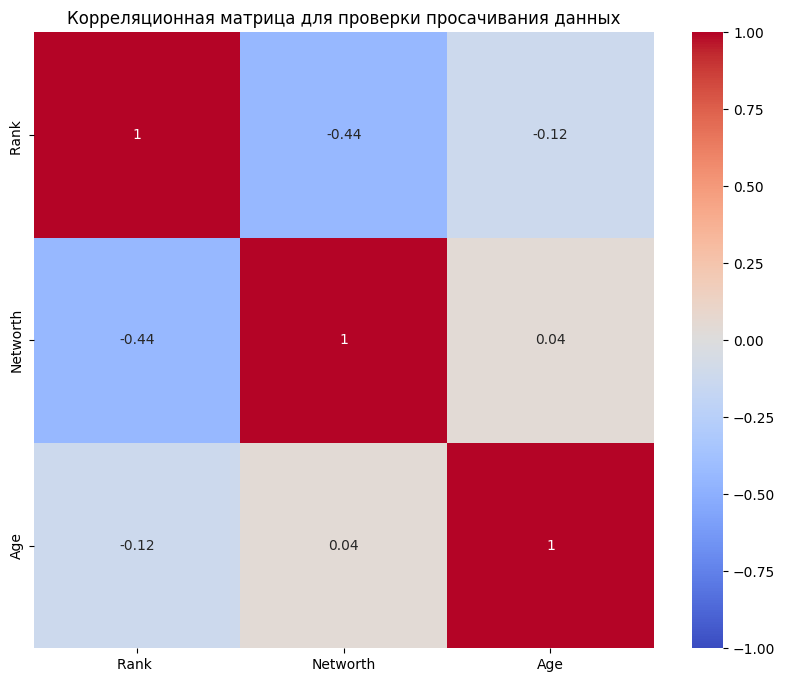

In [88]:
plt.figure(figsize=(10, 8))
numeric_data = df2.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица для проверки просачивания данных')
plt.show()

В данных которые содержаться в таблице нету ни нулевых значений, ни низкой дисперсии, ни выбросов связанных с аномально высокими значениями. По графику видно целом, данные не указывают на очевидное просачивание, поскольку корреляции не слишком высокие и ожидаемы. Данные хорошо сформированны поэтому здесь нет проблем чтобы их решать.

**Оценить качество каждого набора данных:** 

1. Информативность: Набор данных предоставляет достаточную информацию для анализа характиристик миллиардеров.
2. Степень покрытия: Включает данные всего мира поэтому с.п. лучше не придумаешь.
3. Соответствие реальным данным: Данные в целом соответствуют реальным значениям, но это все будет зависеть от года.
4. Согласованность меток: В данных о миллиардерах признаки Source (Источник дохода), Industry (Отрасль) и Country (Страна) могут иметь несогласованность меток, если одна и та же категория указана разными способами.

**Выполнить разбиение каждого набора данных на обучающую, контрольную и тестовую выборки:**

In [95]:
df_numeric = df2.select_dtypes(include='number')

X = df2.drop('Networth', axis=1)  
y = df2['Networth']  

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Проверка размеров выборок
print(f"Исходный размер строк: {df_numeric.shape[0]}")
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер контрольной выборки: {X_val.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Исходный размер строк: 2600
Размер обучающей выборки: 1560
Размер контрольной выборки: 520
Размер тестовой выборки: 520


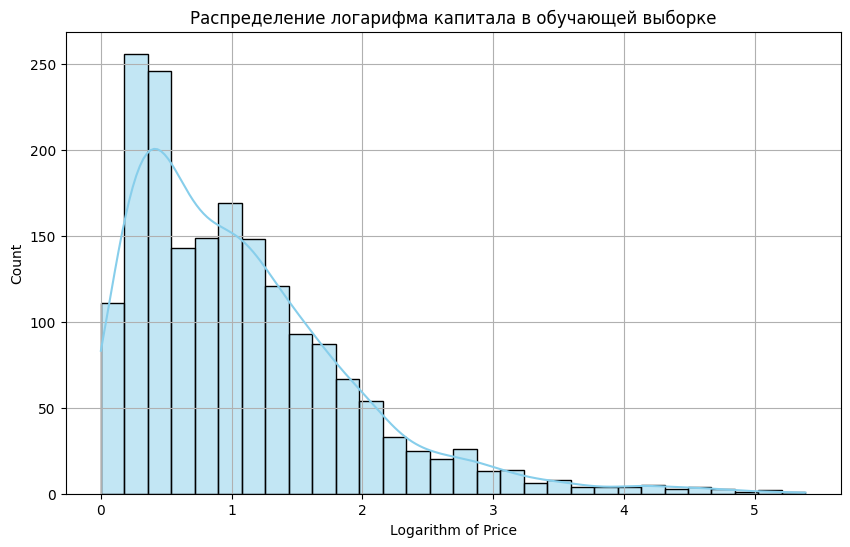

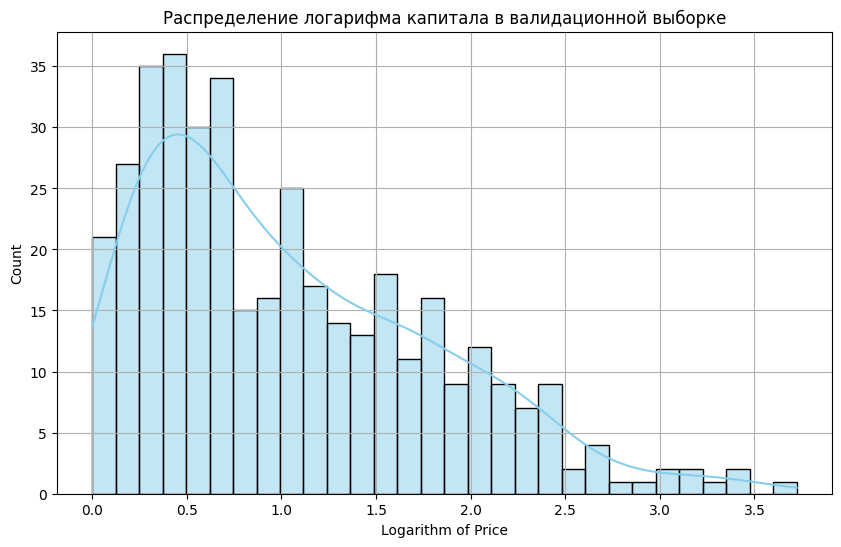

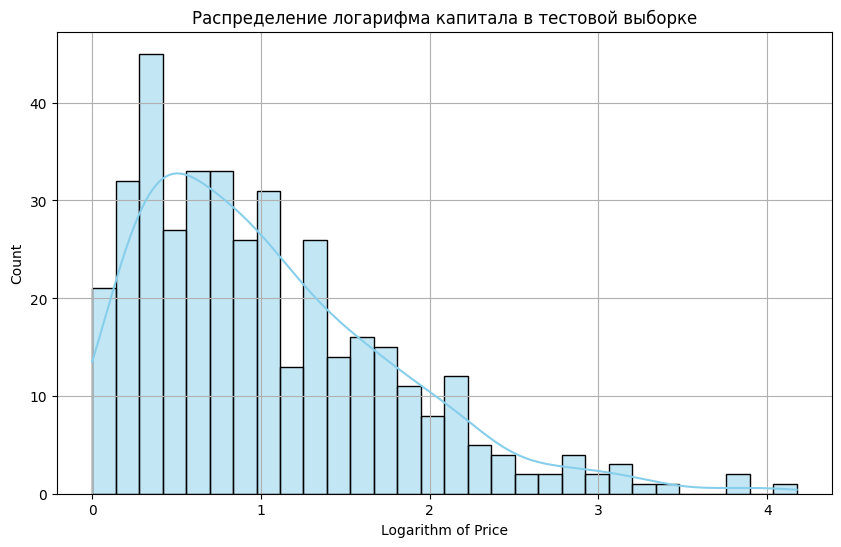

Статистические показатели для обучающей выборки:
Среднее значение: 1.08
Стандартное отклонение: 0.85
Минимальное значение: 0.00
Максимальное значение: 5.39
Количество наблюдений: 1820

Статистические показатели для валидационной выборки:
Среднее значение: 1.04
Стандартное отклонение: 0.77
Минимальное значение: 0.00
Максимальное значение: 3.72
Количество наблюдений: 390

Статистические показатели для тестовой выборки:
Среднее значение: 1.03
Стандартное отклонение: 0.75
Минимальное значение: 0.00
Максимальное значение: 4.17
Количество наблюдений: 390



In [96]:
df2['networth_log'] = np.log(df2['Networth'])

X = df2.drop(['Networth', 'networth_log'], axis=1) 
y = df2['networth_log']  

X = X.select_dtypes(include='number')

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def plot_distribution(data, title):
    """Построение гистограммы распределения целевого признака"""
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, bins=30, color='skyblue')
    plt.title(title)
    plt.xlabel('Logarithm of Price')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

plot_distribution(y_train, 'Распределение логарифма капитала в обучающей выборке')
plot_distribution(y_val, 'Распределение логарифма капитала в валидационной выборке')
plot_distribution(y_test, 'Распределение логарифма капитала в тестовой выборке')

def get_statistics(df2, name):
    print(f"Статистические показатели для {name} выборки:")
    print(f"Среднее значение: {df2.mean():.2f}")
    print(f"Стандартное отклонение: {df2.std():.2f}")
    print(f"Минимальное значение: {df2.min():.2f}")
    print(f"Максимальное значение: {df2.max():.2f}")
    print(f"Количество наблюдений: {df2.count()}\n")

get_statistics(y_train, "обучающей")
get_statistics(y_val, "валидационной")
get_statistics(y_test, "тестовой")

Различия между обучающей, валидационной и тестовой выборками минимальны, и это свидетельствует о хорошем разбиении данных. Методы аугментации данных здесь не требуются, так как количество данных достаточно велико, и выборки сбалансированы по ключевым показателям.

**Выполнить приращение данных методами выборки с избытком (oversampling) и выборки с недостатком (undersampling):**

In [101]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=12)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(random_state=12)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Размеры после oversampling:", X_train_over.shape, y_train_over.shape)
print("Размеры после undersampling:", X_train_under.shape, y_train_under.shape)

Размеры после oversampling: (1945, 6) (1945,)
Размеры после undersampling: (1730, 6) (1730,)


## Pima Indians Diabetes Database
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [119]:
df3 = pd.read_csv(".//static//csv//diabetes.csv")
print(df3.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Набор данных Pima Indians Diabetes Database представляет собой сложную среду, где факторы риска диабета, такие как количество беременностей, уровень глюкозы, давление и индекс массы тела, варьируются в зависимости от множества параметров. Основная проблема заключается в том, как правильно интерпретировать эти данные, выявлять ключевые взаимосвязи между признаками и на основе этого строить точные прогнозы вероятности возникновения диабета.

In [104]:
print(df2.info, "\n")

<bound method DataFrame.info of       Rank                        Name  Networth  Age        Country  \
0         1                 Elon Musk      219.0   50  United States   
1         2                Jeff Bezos      171.0   58  United States   
2         3  Bernard Arnault & family      158.0   73         France   
3         4                Bill Gates      129.0   66  United States   
4         5            Warren Buffett      118.0   91  United States   
...     ...                        ...       ...  ...            ...   
2595   2578    Jorge Gallardo Ballart        1.0   80          Spain   
2596   2578              Nari Genomal        1.0   82    Philippines   
2597   2578            Ramesh Genomal        1.0   71    Philippines   
2598   2578            Sunder Genomal        1.0   68    Philippines   
2599   2578     Horst-Otto Gerberding        1.0   69        Germany   

                      Source                Industry  networth_log  \
0              Tesla, SpaceX     

**Объектами наблюдения** являются пациенты, которые представляют собой индейцев Пима. Каждый пациент представлен одной строкой в таблице, которая описывает его основные характеристики.

**Анализ сведений о каждом наборе данных**: В данном случае каждый набор данных — это информация об отдельном пациенте. Здесь присутствуют атрибуты такие как: Количество беременностей, Уровень глюкозы, Давление, Толщина кожи, Инсулин, Индекс массы тела, Генетическая предрасположенность к диабету, Возраст, Результат.


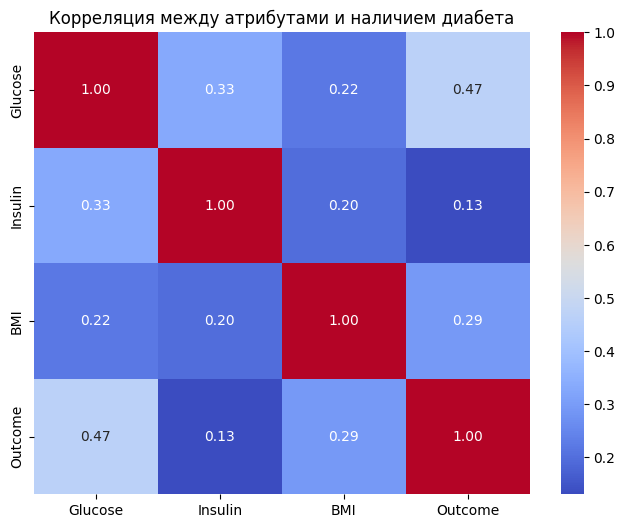

In [105]:
correlation_matrix = df3[['Glucose', 'Insulin', 'BMI', 'Outcome']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между атрибутами и наличием диабета')
plt.show()

1. Glucose и Outcome (0.47):

Уровень глюкозы показывает довольно сильную положительную корреляцию с наличием диабета (корреляция 0.47). Это значит, что чем выше уровень глюкозы в крови, тем больше вероятность развития диабета.

2. BMI и Outcome (0.29):

Индекс массы тела (BMI) также имеет положительную, но более слабую корреляцию с диабетом (0.29). Это указывает на то, что более высокий BMI также связан с повышенным риском диабета, хотя эта связь слабее, чем с уровнем глюкозы.

3. Insulin и Outcome (0.13):

Уровень инсулина имеет самую слабую положительную корреляцию с наличием диабета (0.13). Это может указывать на то, что, хотя инсулин важен для метаболических процессов, в данном наборе данных его влияние на вероятность развития диабета не является значительным.

4. Взаимосвязь между атрибутами:

* Glucose и Insulin (0.33): Существует умеренная положительная корреляция между уровнем глюкозы и инсулина, что ожидаемо, так как инсулин контролирует уровень глюкозы в организме.
* Glucose и BMI (0.22): Также наблюдается слабая положительная корреляция между уровнем глюкозы и BMI, что может свидетельствовать о том, что ожирение в какой-то мере связано с повышением уровня глюкозы в крови.

**Пример бизнес-целей:**
1. Прогнозирование риска диабета

Цель: Создать модель, которая точно предсказывает вероятность развития диабета на основе медицинских параметров пациента, таких как уровень глюкозы, индекс массы тела и количество беременностей.

Эффекты для бизнеса: Повышение эффективности диагностики диабета на ранних стадиях, что позволяет своевременно предложить лечение или профилактические меры. Это может сократить затраты на лечение хронических стадий диабета и улучшить здоровье пациентов.

Вход:

* Уровень глюкозы
* Индекс массы тела (BMI)
* Количество беременностей

Целевой признак: Наличие диабета (Outcome).

2. Анализ факторов риска диабета

Цель: Провести анализ влияния различных факторов (например, возраст, уровень инсулина, давление) на вероятность развития диабета для оптимизации профилактических программ.

Эффекты для бизнеса: Улучшение стратегии профилактики диабета, нацеленное на людей с высоким риском заболевания. Это поможет лучше планировать медицинские ресурсы, а также разработать программы по улучшению здоровья для целевых групп населения.

Вход:

* Возраст
* Уровень инсулина
* Артериальное давление

Целевой признак: Вероятность развития диабета.

3. Оценка состояния здоровья пациентов

Цель: Разработать модель для оценки общего состояния здоровья пациента на основе параметров, таких как индекс массы тела (BMI) и артериальное давление. Это поможет предсказать риски не только диабета, но и других заболеваний, связанных с метаболическим синдромом.

Эффекты для бизнеса: Повышение эффективности медицинских осмотров и точности оценки состояния здоровья пациентов. Это позволяет медицинским организациям улучшить предоставляемые услуги и повысить удовлетворенность пациентов.

Вход:

* Индекс массы тела (BMI)
* Артериальное давление
* Уровень глюкозы

Целевой признак: Оценка состояния здоровья пациента (например, классификация по уровням риска).

**Опредиление проблем данных с помощью кода:**

In [109]:
max_value = df3.max(axis=0)

columns_with_zero = df3.columns[(df3 == 0).any()]

numeric_data = df3.select_dtypes(include='number')

shum = numeric_data.var()

low_dispers = 0.1
low_var_columns = shum[shum < low_dispers]


print("Максимальные значения:\n", max_value, "\n")
print("Признаки с нулевыми значениями:\n", columns_with_zero, "\n")
print("Признаки с низкой дисперсией:\n", low_var_columns, "\n")

Максимальные значения:
 Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64 

Признаки с нулевыми значениями:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Outcome'],
      dtype='object') 

Признаки с низкой дисперсией:
 Series([], dtype: float64) 



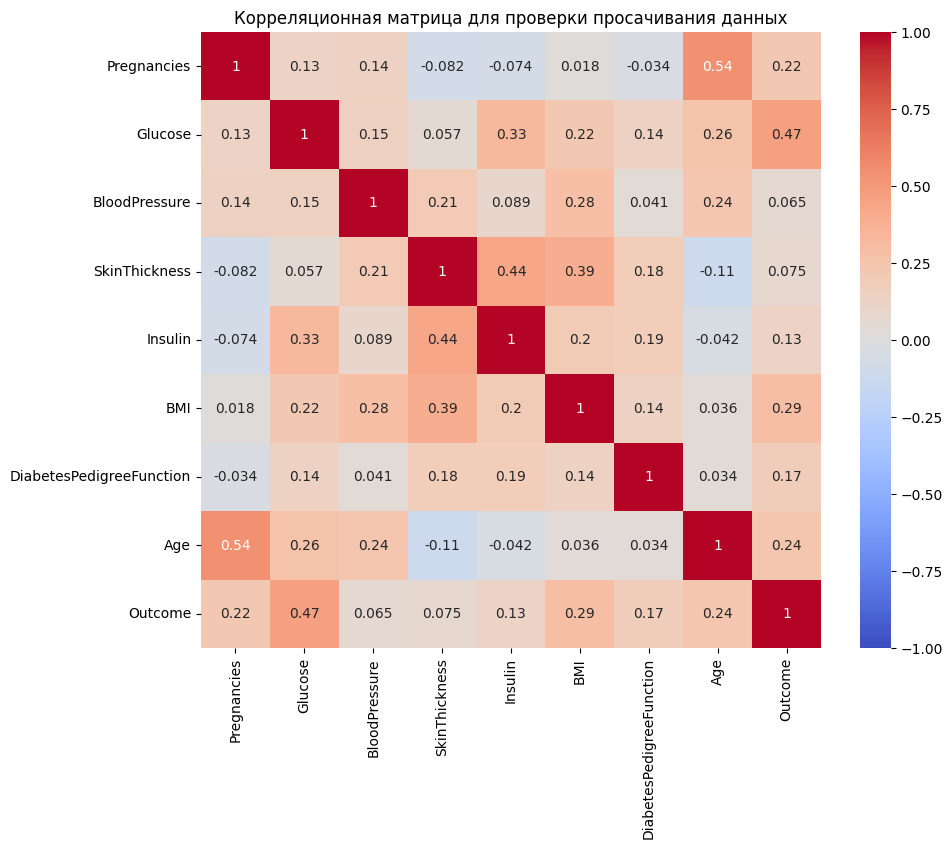

In [108]:
plt.figure(figsize=(10, 8))
numeric_data = df3.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица для проверки просачивания данных')
plt.show()

В данных которые содержаться в таблице нету ни низкой дисперсии, ни выбросов связанных с аномально высокими значениями. Есть только нулевые значения. По графику видно что в целом, данные не указывают на очевидное просачивание, поскольку корреляции не слишком высокие и ожидаемы. Данные хорошо сформированны поэтому здесь нет проблем для анализа.

In [120]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']
df3[numeric_columns] = df3[numeric_columns].replace("-", np.nan)
print("Пропущенные значения до обработки:")
print(df3.isnull().sum())

df3['Pregnancies'] = df3['Pregnancies'].fillna(0) 
df3['Glucose'] = df3['Glucose'].astype(float)  
df3.dropna(subset=['BloodPressure'], inplace=True)  

print("Пропущенные значения после обработки:")
print(df3.isnull().sum())

Пропущенные значения до обработки:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Пропущенные значения после обработки:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Оценить качество каждого набора данных:** 

1. Информативность: Набор данных предоставляет достаточную информацию для анализа характиристик пациента с или без деабета.
2. Степень покрытия: Включает данные только Индии, поэтому поностью на них основываться нельзя.
3. Соответствие реальным данным: Данные в целом соответствуют реальным значениям.
4. Согласованность меток: в основном касается бинарного признака Outcome, который должен принимать только два значения: 1 (диабет) и 0 (отсутствие диабета)

**Выполнить разбиение каждого набора данных на обучающую, контрольную и тестовую выборки:**

In [122]:
X = df3.drop('Outcome', axis=1)  
y = df3['Outcome']  

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape[0])
print("Размер контрольной выборки:", X_val.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 460
Размер контрольной выборки: 154
Размер тестовой выборки: 154


In [124]:
X = df3.drop('Outcome', axis=1)  
y = df3['Outcome']  

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Функция для проверки сбалансированности выборок
def check_balance(y_train, y_val, y_test):
    print("Сбалансированность обучающей выборки:")
    print(y_train.value_counts(normalize=True))
    
    print("\nСбалансированность контрольной выборки:")
    print(y_val.value_counts(normalize=True))
    
    print("\nСбалансированность тестовой выборки:")
    print(y_test.value_counts(normalize=True))

# Проверка сбалансированности
check_balance(y_train, y_val, y_test)

Сбалансированность обучающей выборки:
Outcome
0    0.65
1    0.35
Name: proportion, dtype: float64

Сбалансированность контрольной выборки:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

Сбалансированность тестовой выборки:
Outcome
0    0.655844
1    0.344156
Name: proportion, dtype: float64


**Выполнить приращение данных методами выборки с избытком (oversampling) и выборки с недостатком (undersampling):**

In [126]:
# Разделение на признаки (X) и целевую переменную (y)
X = df3.drop('Outcome', axis=1)  # Признаки
y = df3['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Применение SMOTE для балансировки обучающей выборки
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Функция для проверки сбалансированности выборок
def check_balance(y_train, y_val, y_test):
    print("Сбалансированность обучающей выборки:")
    print(y_train.value_counts(normalize=True))
    
    print("\nСбалансированность контрольной выборки:")
    print(y_val.value_counts(normalize=True))
    
    print("\nСбалансированность тестовой выборки:")
    print(y_test.value_counts(normalize=True))

# Проверка сбалансированности после SMOTE
print("Сбалансированность обучающей выборки после SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

# Проверка сбалансированности контрольной и тестовой выборок
check_balance(y_train_resampled, y_val, y_test)

Сбалансированность обучающей выборки после SMOTE:
Outcome
1    0.5
0    0.5
Name: proportion, dtype: float64
Сбалансированность обучающей выборки:
Outcome
1    0.5
0    0.5
Name: proportion, dtype: float64

Сбалансированность контрольной выборки:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

Сбалансированность тестовой выборки:
Outcome
0    0.655844
1    0.344156
Name: proportion, dtype: float64
